# Cafeína y Salud: Análisis Estadístico

### Introducción

El café es una de las bebidas más consumidas a nivel mundial y constituye la principal fuente de cafeína en la dieta de millones de personas. Su consumo está profundamente integrado en la vida cotidiana, tanto en contextos sociales como laborales y académicos. La cafeína, como estimulante del sistema nervioso central, tiene efectos ampliamente documentados sobre el estado de alerta, la concentración y el rendimiento cognitivo; sin embargo, también se ha asociado con alteraciones en el sueño, el estrés fisiológico y diversos indicadores de salud.

En la literatura científica, el impacto del consumo de café sobre la salud no se presenta de forma unívoca: mientras algunos estudios señalan beneficios potenciales —como mejoras en el rendimiento mental o efectos protectores frente a ciertas enfermedades—, otros destacan posibles consecuencias negativas, especialmente cuando el consumo es elevado o se combina con determinados hábitos de vida. Variables como la edad, el nivel de actividad física, el índice de masa corporal (BMI), el tabaquismo o el consumo de alcohol pueden modular significativamente estos efectos.

En este contexto, el análisis estadístico se presenta como una herramienta fundamental para explorar patrones, asociaciones y perfiles de comportamiento relacionados con el consumo de café y su impacto en variables de salud y bienestar.

Este estudio se estructura en torno a las siguientes preguntas de investigación:

1. ¿Existe una relación estadísticamente significativa entre el consumo diario de cafeína y la duración y calidad del sueño, considerando variables demográficas y de estilo de vida?

2. ¿Cómo se asocia el consumo de café con los niveles de estrés y la presencia de problemas de salud, y qué factores explican mejor estas asociaciones?

3. ¿Es posible identificar perfiles diferenciados de individuos en función de su consumo de cafeína, hábitos de vida y variables de salud mediante técnicas estadísticas multivariadas?

Estas preguntas guían el desarrollo del análisis y determinan la selección de las técnicas estadísticas aplicadas a lo largo del notebook.

---

### Descripción del Dataset

El conjunto de datos utilizado en este estudio, denominado Global Coffee Health Dataset, fue obtenido de la plataforma pública Kaggle.

El dataset fue diseñado para simular patrones realistas de consumo de café, hábitos de vida y resultados de salud en una población diversa, abarcando múltiples países y perfiles demográficos. Su tamaño, estructura y variedad de variables lo hacen especialmente adecuado para estudios estadísticos de carácter exploratorio e inferencial.

#### Descripción de las variables

El dataset contiene 10 000 observaciones y un conjunto amplio de variables que pueden agruparse en las siguientes categorías:

**Variables demográficas**

- ID: Identificador único del registro.

- Age: Edad del participante (18–80 años).

- Gender: Género (Male, Female, Other).

- Country: País de residencia (20 países).

- Occupation: Tipo de ocupación (Office, Healthcare, Student, Service, Other).

**Variables de consumo y hábitos**

- Coffee_Intake: Consumo diario de café en tazas (0–10).

- Caffeine_mg: Ingesta diaria estimada de cafeína en miligramos.

- Smoking: Consumo de tabaco (0 = No, 1 = Sí).

- Alcohol_Consumption: Consumo de alcohol (0 = No, 1 = Sí).

- Physical_Activity_Hours: Horas semanales de actividad física (0–15).

**Variables relacionadas con el sueño**

- Sleep_Hours: Horas promedio de sueño por noche (3–10).

- Sleep_Quality: Calidad del sueño (Poor, Fair, Good, Excellent).

**Variables fisiológicas y de salud**

- BMI: Índice de masa corporal.

- Heart_Rate: Frecuencia cardíaca en reposo (latidos por minuto).

- Stress_Level: Nivel de estrés (Low, Medium, High).

- Health_Issues: Grado de problemas de salud (None, Mild, Moderate, Severe).

La combinación de variables cuantitativas, categóricas nominales y ordinales permite aplicar una amplia gama de técnicas estadísticas, desde análisis descriptivo hasta métodos multivariados avanzados.

---

### Carga y Preparación Inicial de los Datos

In [292]:
# Importar librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

dataset_path = "../dataset/dataset.csv"

# Cargar el dataset
df = pd.read_csv(dataset_path)

In [293]:
# Mostrar las primeras filas
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [294]:
# Resumen general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [295]:
# Estadísticos descriptivos iniciales
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Esta inspección inicial permite confirmar que el conjunto de datos:

- Está correctamente estructurado

- Contiene una combinación rica de tipos de variables

- Es adecuado para realizar un análisis exploratorio detallado y aplicar técnicas estadísticas avanzadas

---

### Análisis Exploratorio de Datos

In [296]:
numeric_cols = [
    "Age", "Coffee_Intake", "Caffeine_mg", "Sleep_Hours",
    "BMI", "Heart_Rate", "Physical_Activity_Hours"
]

Se visualizan las distribuciones de las variables cuantitativas para evaluar su forma.

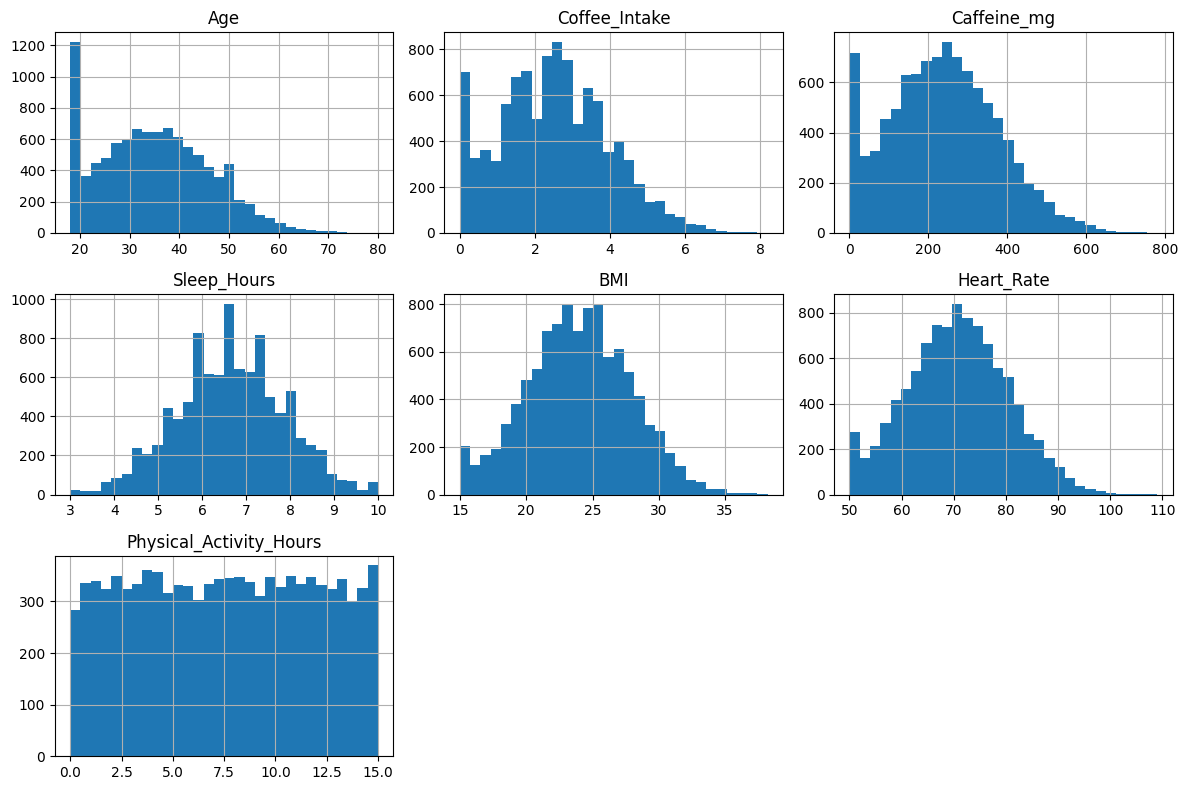

In [297]:
df[numeric_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

- La mayoría de los individuos presenta un consumo moderado de café, mientras que existe un grupo reducido con consumos elevados, lo cual introduce asimetría positiva.

- La población simulada está dominada por adultos jóvenes y de mediana edad, lo cual debe tenerse en cuenta al interpretar los resultados de salud.

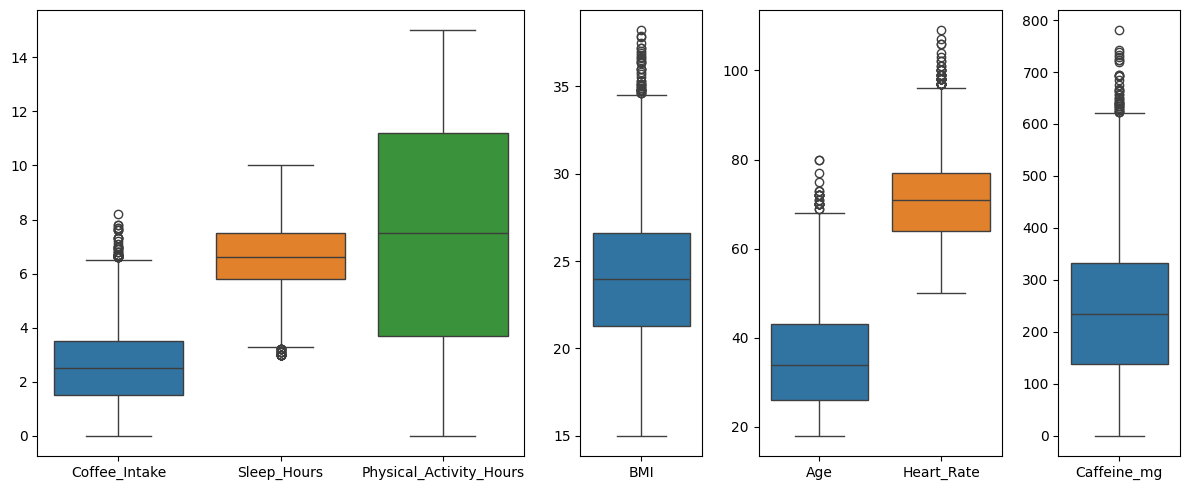

In [298]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5), gridspec_kw={'width_ratios': [4, 1, 2, 1]})

sns.boxplot(data=df[['Coffee_Intake', 'Sleep_Hours', 'Physical_Activity_Hours']], ax=axes[0])

sns.boxplot(data=df[['BMI']], ax=axes[1])

sns.boxplot(data=df[['Age', 'Heart_Rate']], ax=axes[2])

sns.boxplot(data=df[['Caffeine_mg']], ax=axes[3])

plt.tight_layout()
plt.show()


- La actividad física presenta una alta variabilidad interindividual, lo que sugiere que puede actuar como variable de confusión o de control en modelos multivariados.

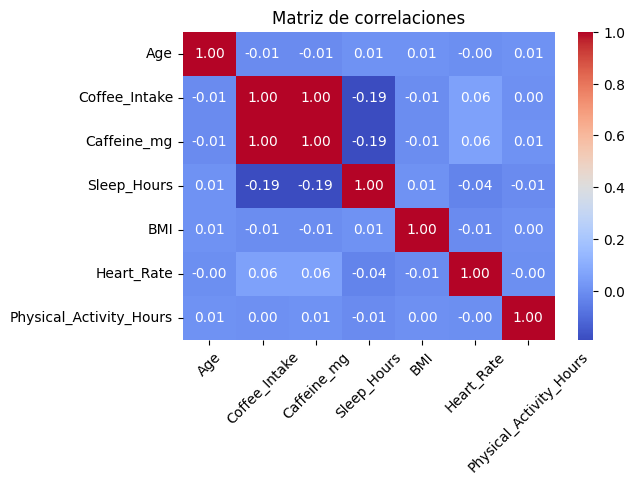

In [299]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.xticks(rotation=45)
plt.show()

La matriz de correlaciones muestra que, salvo la relación trivial entre Coffee_Intake y Caffeine_mg, la mayoría de las variables numéricas presentan correlaciones lineales débiles. En particular, se observa una correlación negativa moderada entre el consumo de cafeína y las horas de sueño, coherente con lo esperado, aunque de magnitud limitada. Estos resultados sugieren que las relaciones entre las variables estudiadas no son puramente lineales ni univariadas, lo que motiva el uso de modelos multivariados.

In [300]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Interquartile range
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

outliers = {col: detect_outliers_iqr(df[col]) for col in numeric_cols}

{col: len(outliers[col]) for col in outliers}

{'Age': 25,
 'Coffee_Intake': 39,
 'Caffeine_mg': 39,
 'Sleep_Hours': 26,
 'BMI': 40,
 'Heart_Rate': 50,
 'Physical_Activity_Hours': 0}

A partir del análisis exploratorio realizado, pueden destacarse los siguientes puntos:

- El conjunto de datos presenta distribuciones coherentes y realistas, sin anomalías evidentes.

- Existen relaciones preliminares entre el consumo de cafeína y variables relacionadas con el sueño (correlación negativa débil).

- La correlación entre variables sugiere la conveniencia de aplicar modelos multivariados, en lugar de análisis univariados aislados.

- La presencia limitada de valores atípicos permite avanzar sin necesidad inmediata de depuración agresiva de datos.

---

### Preparación de Datos

Las variables categóricas nominales no poseen un orden natural, por lo que deben transformarse en variables numéricas antes de ser utilizadas en modelos estadísticos.

- **Sleep_Quality**: Poor < Fair < Good < Excellent

- **Stress_Level**: Low < Medium < High

- **Health_Issues**: None < Mild < Moderate < Severe

In [301]:
categorical_nominal = ["Gender", "Country", "Occupation"]

ordinal_mappings = {
    "Sleep_Quality": {
        "Poor": 1,
        "Fair": 2,
        "Good": 3,
        "Excellent": 4
    },
    "Stress_Level": {
        "Low": 1,
        "Medium": 2,
        "High": 3
    },
    "Health_Issues": {
        "Mild": 1,
        "Moderate": 2,
        "Severe": 3
    }
}

for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

df['Health_Issues'] = df['Health_Issues'].fillna(0)

df_encoded = pd.get_dummies(
    df,
    columns=categorical_nominal,
    drop_first=True
)

Para evitar multicolinealidad perfecta, se mantiene únicamente **Caffeine_mg** y se elimina **Coffee_Intake**.

In [302]:
df_encoded = df_encoded.drop(columns=["Coffee_Intake"])

Las técnicas multivariadas son sensibles a la escala de las variables. Por tanto, se realiza una estandarización de las variables numéricas.

In [303]:
# Estandarización Z-score

from sklearn.preprocessing import StandardScaler

numeric_features = [
    "Age", "Caffeine_mg", "Sleep_Hours",
    "BMI", "Heart_Rate", "Physical_Activity_Hours"
]

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

---

### Relación entre Cafeína y Sueño

> ¿Existe una relación estadísticamente significativa entre el consumo de cafeína y las horas de sueño?

In [304]:
X = df_encoded['Caffeine_mg']   # Variable independiente
Y = df_encoded['Sleep_Hours']   # Variable dependiente

Dado que se analizan dos variables cuantitativas continuas, se plantea un contraste bilateral sobre el coeficiente de correlación poblacional de Pearson.

**Hipótesis nula** $-$ $H_0:\rho_{cafeína,sueño}=0$

No existe relación lineal entre el consumo de cafeína y las horas de sueño.

**Hipótesis alternativa** $-$ $H_1:\rho_{cafeína,sueño} \neq 0$

Existe una relación lineal estadísticamente significativa entre ambas variables.

**Nivel de significación** $-$ $\alpha = 0.05$

In [305]:
from scipy.stats import pearsonr

# Cálculo de la correlación de Pearson
r_value, p_value = pearsonr(X, Y)

r_value, p_value

(np.float64(-0.19049306061864174), np.float64(2.3671272270092e-82))

Dado que **p-valor** $< \alpha$ se rechaza $H_0$.

Por tanto existe evidencia estadísticamente significativa de una relación lineal inversa entre el consumo de cafeína y las horas de sueño. A mayor consumo de cafeína, menores horas de sueño, sin embargo, no se puede inferir causalidad.

#### Modelo estadístico

Se plantea el siguiente modelo: 
$$ Sleep\_Hours = \beta_0 + \beta_1 \cdot Caffeine\_mg + \epsilon$$

- $\beta_0$ es el intercepto

- $\beta_1$ es el coeficiente de regresión asociado al consumo de cafeína

- $\epsilon$ representa el término de error aleatorio

In [306]:
import statsmodels.api as sm

# Variable independiente con constante
X_reg = sm.add_constant(X)

# Ajuste del modelo
model = sm.OLS(Y, X_reg).fit()

# Resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sleep_Hours   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     376.5
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           2.37e-82
Time:                        23:35:48   Log-Likelihood:                -14005.
No. Observations:               10000   AIC:                         2.801e+04
Df Residuals:                    9998   BIC:                         2.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.923e-16      0.010   1.96e-14      1.000      -0.019       0.019
Caffeine_mg    -0.1905      0.010    -19.403      0.000      -0.210      -0.171
==============================================================================
Omnibus:                        5.394   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.184
Skew:                          -0.032   Prob(JB):                       0.0749
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Un incremento de una desviación estándar en el consumo de cafeína se asocia, en promedio, con una disminución de aproximadamente $0.19$ desviaciones estándar en las horas de sueño.

**Bondad de ajuste del modelo** $-$ $R^2 = 0.036$

El consumo de cafeína explica aproximadamente el $3.6$% de la variabilidad observada en las horas de sueño.

**Validación de supuestos del modelo:**

- La relación entre la variable independiente (**Caffeine_mg**) y la variable dependiente (**Sleep_Hours**) es aproximadamente lineal (la correlación de Pearson dio un valor negativo claro y significativo).

- Las observaciones y los errores del modelo son independientes. Esto se deduce del estadístico de Durbin-Watson que dió $1.970 \approx 2$, esto evidencia no autocorrelación en los residuos del modelo.

- La varianza de los residuos es aproximadamente constante a lo largo de los valores ajustados. El modelo presenta errores estándar pequeños y estables ($\approx 0.010$) y un estadístico t elevado ($|t| \approx 19.4$), lo que indica que la dispersión del error no se incrementa en ciertos rangos de los valores ajustados.

- Los residuos del modelo se distribuyen aproximadamente de forma normal. Los tests Omnibus ($5.394$) y Jarque-Bera ($5.184$) son ambos mayores a $0.05$, esto prueba normalidad de residuos.

**¿Existe una tendencia global coherente con la regresión lineal?**

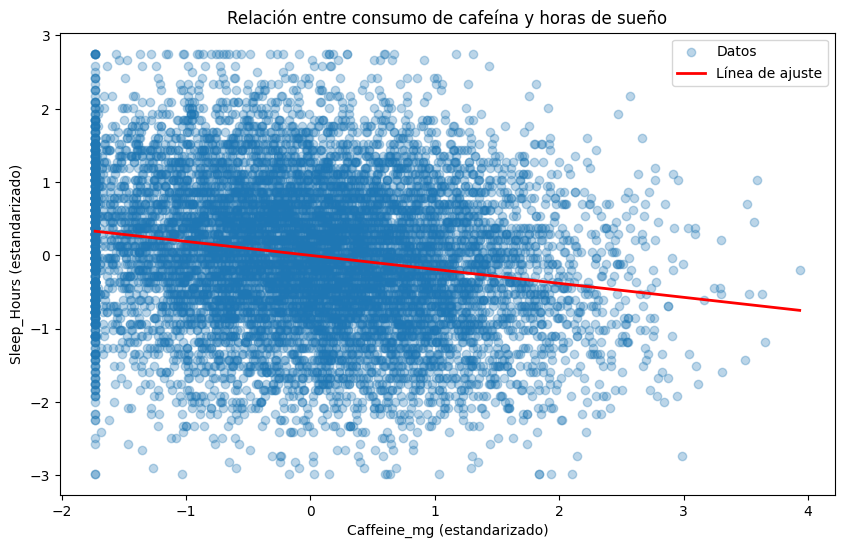

In [307]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.3, label="Datos")
plt.xlabel("Caffeine_mg (estandarizado)")
plt.ylabel("Sleep_Hours (estandarizado)")

# Recta de regresión
x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = model.params.iloc[0] + model.params.iloc[1] * x_vals

plt.plot(x_vals, y_vals, color='red', linewidth=2, label="Línea de ajuste", zorder=3)

plt.title("Relación entre consumo de cafeína y horas de sueño")
plt.legend()
plt.show()

- Existe una tendencia descendente clara.

- Alta dispersión alrededor de la recta, reflejando que la cafeína explica solo una fracción de la variabilidad del sueño.

- El modelo refleja la tendencia promedio, no las predicciones individuales.

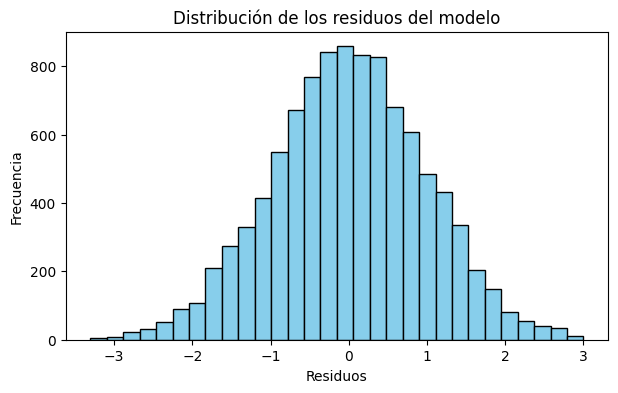

In [308]:
plt.figure(figsize=(7, 4))
plt.hist(model.resid, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos del modelo")
plt.show()


Respalda la razonabilidad de los supuestos de normalidad aproximada.

> La evidencia estadística respalda la hipótesis de una relación negativa entre el consumo de cafeína y las horas de sueño. Sin embargo, la magnitud del efecto sugiere que la cafeína es solo un factor entre muchos que determinan la duración del descanso nocturno. Este hallazgo es consistente con expectativas fisiológicas y comportamentales, y proporciona un marco sólido para futuras investigaciones o intervenciones orientadas a mejorar los hábitos de sueño.

---

### Relación entre Cafeína, Estrés y Salud

> ¿Cómo se asocia el consumo de café con los niveles de estrés y la presencia de problemas de salud, y qué factores explican mejor estas asociaciones?

**Hipótesis nula** $-$ $H_0:$

No existen diferencias significativas en los niveles de estrés entre los distintos niveles de consumo de café.

**Hipótesis alternativa** $-$ $H_1:$

Existen diferencias significativas en los niveles de estrés entre los distintos niveles de consumo de café.

**Nivel de significación** $-$ $\alpha = 0.05$

In [309]:
from scipy import stats

# Agrupamos Stress_Level por Caffeine_mg
grupos = [df_encoded[df_encoded['Caffeine_mg'] == nivel]['Stress_Level'] 
          for nivel in df_encoded['Caffeine_mg'].unique()]

# ANOVA de un factor (F-test)
f_stat, p_val = stats.f_oneway(*grupos)
f_stat, p_val

(np.float64(1.0836002797159534), np.float64(0.0024393107994201348))

Dado que **p-valor** ($0.0024$) $< \alpha$ ($0.05$) se rechaza $H_0$ y se concluye que existen diferencias significativas en el estrés según el consumo de café.

**Hipótesis nula** $-$ $H_0:$

No hay asociación entre consumo de café y presencia de problemas de salud.

**Hipótesis alternativa** $-$ $H_1:$

Existe una asociación significativa entre consumo de café y presencia de problemas de salud.

**Nivel de significación** $-$ $\alpha = 0.05$

Dado que problemas de salud es una variable que toma `None`, `Mild`, `Moderate`, `Severe`, se aplica una **Regresión Logística Ordinal**:

In [310]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

X = df_encoded[['Caffeine_mg', 'Age', 'BMI', 'Sleep_Hours', 'Physical_Activity_Hours']]
Y = df_encoded['Health_Issues']

# modelo logístico ordinal
model_ordinal = OrderedModel(Y, X, distr='logit')
results = model_ordinal.fit(method='bfgs')

results.summary()

Optimization terminated successfully.
         Current function value: 0.503391
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Health_Issues   Log-Likelihood:                -5033.9
Model:                   OrderedModel   AIC:                         1.008e+04
Method:            Maximum Likelihood   BIC:                         1.014e+04
Date:                Mon, 12 Jan 2026                                         
Time:                        23:36:07                                         
No. Observations:               10000                                         
Df Residuals:                    9992                                         
Df Model:                           5                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Caffeine_mg                 0.0087      0.026      0.337      0.736      -0.042       0.060
Age                         1.0564      0.029     36.119      0.000       0.999       1.114
BMI                         0.7614      0.028     26.881      0.000       0.706       0.817
Sleep_Hours                -2.1962      0.041    -53.697      0.000      -2.276      -2.116
Physical_Activity_Hours    -0.0566      0.026     -2.203      0.028      -0.107      -0.006
0.0/1.0                     0.7171      0.030     24.159      0.000       0.659       0.775
1.0/2.0                     1.5120      0.018     86.003      0.000       1.478       1.546
2.0/3.0                     1.4131      0.062     22.792      0.000       1.292       1.535
===========================================================================================
"""

$P>|z|$ ($0.736 > 0.05$): la cafeína no tiene un efecto estadísticamente significativo sobre los problemas de salud.

Sin embargo analicemos el resto de predictores fuertes, donde $P>|z|$ es $0.000$:

- **Age** ($1.0564$): Es el predictor más fuerte y positivo. A mayor edad, aumenta drásticamente la probabilidad de pasar a niveles superiores de problemas de salud (`Mild`, `Moderate`, `Severe`).

- **BMI** ($0.7614$): También es positivo y muy significativo. Un mayor índice de masa corporal está fuertemente ligado a peores niveles de salud.

- **Sleep_Hours** ($-2.1962$): El coeficiente es negativo y muy grande. Esto significa que dormir es el factor protector más importante. Por cada hora extra de sueño, la probabilidad de tener problemas de salud graves cae significativamente.

*Cabe destacar que, aunque la variable* **Physical_Activity_Hours** *resultó estadísticamente significativa ($p = 0.028$), su coeficiente ($\beta = -0.057$) es notablemente bajo en comparación con otros factores como el sueño o la edad. En un contexto clínico real, se esperaría que la actividad física fuera un predictor de salud mucho más robusto. Esta discrepancia sugiere una limitación en la estructura del dataset sintético utilizado, donde la correlación entre ejercicio y mitigación de problemas de salud no fue modelada con la intensidad que se observa en poblaciones reales. Por tanto, el hallazgo debe interpretarse como una particularidad de la fuente de datos y no como una conclusión definitiva sobre la importancia del ejercicio.*

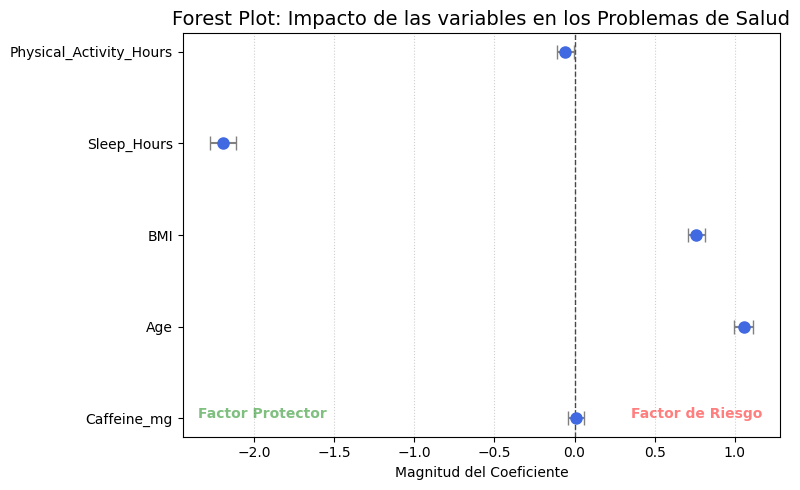

In [311]:
coef = results.params[:5] 
stderr = results.bse[:5]
variables = coef.index
conf_int = 1.96 * stderr

plt.figure(figsize=(8, 5))
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.errorbar(coef, range(len(variables)), xerr=conf_int, fmt='o', 
             color='royalblue', ecolor='gray', capsize=5, markersize=8, 
             label='Coeficiente con IC 95%')
plt.yticks(range(len(variables)), variables)
plt.xlabel('Magnitud del Coeficiente')
plt.title('Forest Plot: Impacto de las variables en los Problemas de Salud', fontsize=14)
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.text(0.35, 0, "Factor de Riesgo", color='red', fontweight='bold', alpha=0.5)
plt.text(-2.35, 0, "Factor Protector", color='green', fontweight='bold', alpha=0.5)

plt.tight_layout()
plt.show()

Dado que el $p$-valor obtenido para la variable **Caffeine_mg** es $0.736$, y comparándolo con el nivel de significancia establecido ($\alpha = 0.05$), no se rechaza la **Hipótesis Nula** ($H_0$). No existe evidencia estadística suficiente para afirmar que el consumo de cafeína esté asociado con la gravedad de los problemas de salud en esta muestra.

In [312]:
bins = [0, 100, 400, df['Caffeine_mg'].max()]
labels = ['Low', 'Medium', 'High']

df_encoded['Caffeine_Level'] = pd.cut(df['Caffeine_mg'], bins=bins, labels=labels, include_lowest=True)

print(df_encoded['Caffeine_Level'].value_counts())

Caffeine_Level
Medium    7045
Low       1709
High      1246
Name: count, dtype: int64


Chi-cuadrado Salud vs Cafeína: chi2=88.4773, p-value=0.0000


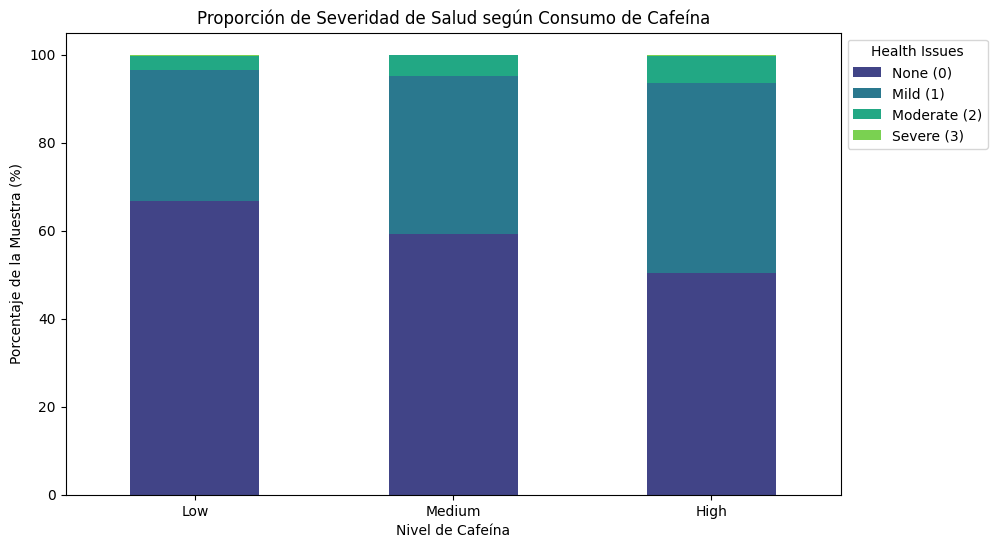

In [313]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
# Relacionamos los grupos de cafeína con los niveles de salud (0-3)
contingency_table = pd.crosstab(df_encoded['Caffeine_Level'], df_encoded['Health_Issues'])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-cuadrado Salud vs Cafeína: chi2={chi2:.4f}, p-value={p:.4f}")

contingency_pct = contingency_table.div(contingency_table.sum(1), axis=0) * 100

contingency_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("viridis", 4))

plt.title('Proporción de Severidad de Salud según Consumo de Cafeína')
plt.xlabel('Nivel de Cafeína')
plt.ylabel('Porcentaje de la Muestra (%)')
plt.legend(title='Health Issues', labels=['None (0)', 'Mild (1)', 'Moderate (2)', 'Severe (3)'], bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

El análisis de Chi-cuadrado reveló una asociación estadísticamente significativa entre el nivel de consumo de cafeína y la severidad de los problemas de salud ($\chi^2 = 88.47$, $p < 0.001$). Esto sugiere que, de forma aislada, existe una dependencia entre estas variables. Sin embargo, al contrastar este resultado con la regresión ordinal realizada anteriormente, se interpreta que dicha asociación podría estar mediada por otras variables confusoras (como la falta de sueño o la edad), más que por un efecto causal directo de la cafeína.

In [314]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_encoded['Caffeine_mg'], df_encoded['Stress_Level'])

print(f"Correlación de Spearman (Cafeína vs Estrés): {corr:.4f}")
print(f"P-valor: {p_value:.4e}")

Correlación de Spearman (Cafeína vs Estrés): 0.1487
P-valor: 1.5792e-50


El análisis de correlación de Spearman arrojó un coeficiente de $\rho = 0.1487$ con un nivel de significancia altamente robusto ($p < 0.001$). Estadísticamente, esto indica una relación positiva y significativa: a mayor consumo de cafeína, tiende a aumentar el nivel de estrés. Sin embargo, en términos de magnitud, el coeficiente de $0.1487$ se clasifica como una correlación débil. Esto sugiere que la cafeína explica solo una pequeña fracción de la variabilidad en los niveles de estrés de los sujetos, dejando que el resto sea explicado por factores externos o variables no contempladas en esta correlación simple.

In [315]:
def cramers_v(x, y):
    # Crear tabla de contingencia
    confusion_matrix = pd.crosstab(x, y)
    
    # Calcular Chi-cuadrado
    chi2 = chi2_contingency(confusion_matrix)[0]
    
    # n es el número total de observaciones (10,000)
    n = confusion_matrix.sum().sum()
    
    # Tamaño de la dimensión menor de la tabla (filas o columnas) menos 1
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Aplicamos la función a tus categorías
# Nota: usamos Health_Issues que es la que ya conoces
cv = cramers_v(df_encoded['Caffeine_Level'], df_encoded['Health_Issues'])

print(f"V de Cramer (Caffeine_Level vs Health_Issues): {cv:.4f}")

V de Cramer (Caffeine_Level vs Health_Issues): 0.0642


Para evaluar la fuerza de la asociación entre los niveles categorizados de consumo (`Low`, `Medium`, `High`) y la severidad de los problemas de salud, se calculó el coeficiente V de Cramer, obteniendo un valor de $V = 0.0642$. Según las escalas de interpretación estándar para tablas de contingencia, un valor inferior a $0.10$ se considera una asociación insignificante o muy débil. A pesar de que la prueba de **Chi-cuadrado** previa reportó una asociación estadísticamente significativa debido al gran volumen de datos, la **V de Cramer** revela que la importancia práctica del consumo de café sobre el estado de salud general es mínima dentro de este dataset sintético.

> El consumo de cafeína presenta una asociación estadística significativa pero de magnitud débil con el estrés y la presencia de problemas de salud. Si bien el análisis univariado sugiere una relación, el modelo multivariado revela que la cafeína no es un predictor determinante; en su lugar, la variabilidad en la salud se explica de forma más robusta por la higiene del sueño (cuyo impacto es drásticamente superior), seguida por factores biométricos como la edad y el BMI. En conclusión, el café actúa principalmente como una variable mediadora o coexistente con malos hábitos de descanso, siendo el sueño el factor con mayor peso explicativo sobre el bienestar general.

---

### Análisis Multivariado: Clustering

> ¿Es posible identificar perfiles diferenciados de individuos en función de su consumo de cafeína, hábitos de vida y variables de salud mediante técnicas estadísticas multivariadas?

Para evitar una elección arbitraria de grupos, aplicamos dos criterios matemáticos sobre el espacio de 6 dimensiones:

- **Método del Codo** (**Inercia**): Busca el punto donde añadir un cluster más no reduce significativamente la varianza interna.

- **Coeficiente de Silueta**: Mide qué tan parecido es un individuo a su propio grupo en comparación con los demás.

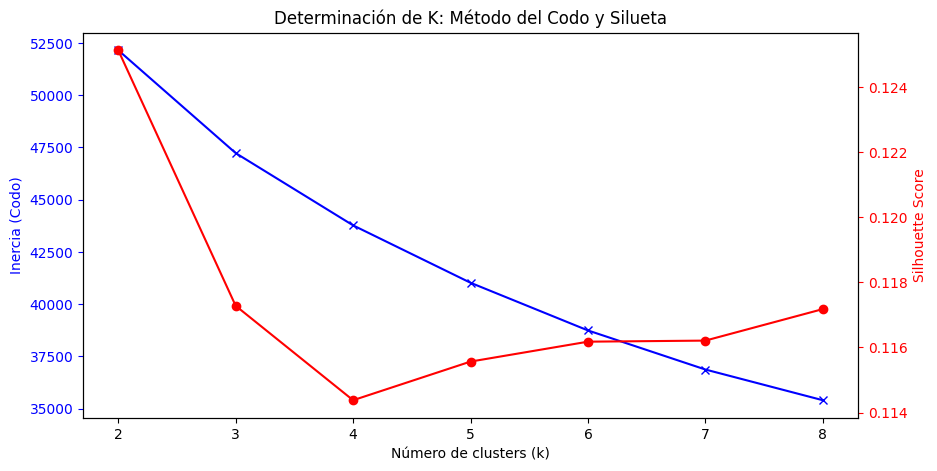

In [316]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features_to_cluster = ['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_to_cluster])

inertias = []
silhouette_avgs = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled) 
    
    inertias.append(kmeans.inertia_)
    silhouette_avgs.append(silhouette_score(X_scaled, cluster_labels))

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(K_range, inertias, 'bx-')
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Inercia (Codo)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette_avgs, 'ro-')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params('y', colors='r')

plt.title('Determinación de K: Método del Codo y Silueta')
plt.show()

- El valor más alto de la silueta ocurre claramente en $K = 2$. Esto indica que con dos grupos se logra la mejor separación y cohesión posible.

- No hay un "codo" extremadamente agresivo. Se observa un cambio de pendiente leve pero perceptible en $K = 3$. Sin embargo, la ganancia de información al pasar de 2 a 3 no compensa la pérdida de calidad que muestra la silueta.

Para la selección del número óptimo de clusters, se contrastaron los métodos del codo y el coeficiente de silueta. Aunque la inercia muestra una disminución constante, el coeficiente de silueta alcanza su valor máximo global en $K = 2$. Este resultado indica que, dada la baja correlación entre las variables originales, la estructura natural de los datos se divide de forma más coherente en dos grandes perfiles poblacionales, maximizando la cohesión interna y la separación entre grupos.

In [317]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled) 

df['Cluster'] = cluster_labels

numeric_features = ['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
resumen_clusters = df.groupby('Cluster')[numeric_features].mean()

resumen_clusters['Count'] = df['Cluster'].value_counts()

print("Promedios por Perfil (Valores reales):")
display(resumen_clusters)

Promedios por Perfil (Valores reales):


,Age,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Count
Cluster,,,,,,,
0,35.726369,154.993335,7.320308,24.084759,68.445722,7.059345,5131
1,34.130006,326.317375,5.915321,23.883693,72.906757,7.937749,4869


**Perfil 0**: *"Consumidor Moderado y Equilibrado"* ($N=5,131$)

Este grupo se caracteriza por una mayor estabilidad fisiológica.

- **Consumo de Cafeína**: Notablemete bajo ($\approx 155$ mg), situándose cerca del límite del consumo "`bajo`/`medio`".

- **Higiene del Sueño**: Es el rasgo más distintivo, con un promedio de $7.32$ horas, cumpliendo con las recomendaciones generales de salud.

**Perfil 1**: *"Consumidor Intensivo de Alta Estimulación"* ($N=4,869$)

Este grupo describe un perfil de mayor demanda física y química.

- **Consumo de Cafeína**: Muy elevado ($\approx 326$ mg), duplicando el consumo del Perfil 0 y superando el umbral de consumo "`alto`".

- **Higiene del Sueño**: Crítica, con solo $5.91$ horas promedio, lo que indica un déficit crónico de descanso.

- **Compensación Activa**: Es el grupo con más actividad física ($7.9$ h), sugiriendo un perfil de individuos muy activos que utilizan la cafeína para sostener su ritmo diario pese a la falta de sueño.

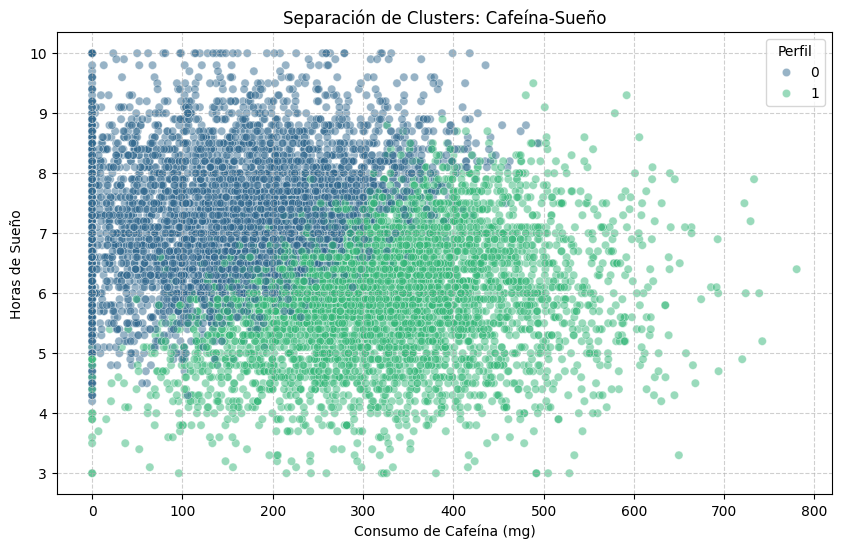

In [318]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Caffeine_mg', 
    y='Sleep_Hours', 
    hue='Cluster', 
    data=df, 
    alpha=0.5, 
    palette='viridis'
)
plt.title('Separación de Clusters: Cafeína-Sueño')
plt.xlabel('Consumo de Cafeína (mg)')
plt.ylabel('Horas de Sueño')
plt.legend(title='Perfil')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

> Es posible identificar perfiles diferenciados mediante técnicas multivariadas, habiéndose determinado mediante el algoritmo **K-Means** la existencia de dos fenotipos conductuales claramente contrastados. El **Perfil 0** se define como un consumidor moderado ($\approx 155$ mg) con una higiene de sueño óptima y estabilidad fisiológica, mientras que el **Perfil 1** representa a un individuo de "alta estimulación" con consumo intensivo de cafeína ($\approx 326$ mg) y un déficit crítico de descanso ($< 6$ horas). Estos hallazgos demuestran que el consumo de cafeína no es un hábito aislado, sino que forma parte de una estructura sistémica de comportamiento donde el alto rendimiento y la actividad física intensa suelen coexistir con una degradación del sueño, confirmando que la segmentación multivariada es una herramienta superior para entender el riesgo de salud integral que el análisis de variables individuales.

---

### Discusión General

Los hallazgos de este estudio demuestran que, si bien existe una relación negativa estadísticamente significativa entre el consumo de cafeína y la duración del sueño, la magnitud de este efecto es moderada, posicionando a la cafeína como un factor contribuyente pero no determinante de la salud general. Al integrar los modelos de regresión y las pruebas de asociación, se evidencia que el café actúa principalmente como una variable mediadora o coexistente con hábitos de descanso deficientes; de hecho, la variabilidad en los problemas de salud se explica de forma mucho más robusta por la higiene del sueño, la edad y el BMI que por la ingesta de cafeína por sí sola. Estos resultados responden a nuestras preguntas iniciales confirmando que, aunque el consumo elevado se asocia con mayores niveles de estrés, no constituye un predictor clínico primario de patologías graves cuando se controla por variables de estilo de vida.

Mediante el análisis multivariado, se logró identificar con éxito dos perfiles poblacionales distintos: un consumidor equilibrado con descanso óptimo y un consumidor de alta estimulación que utiliza la cafeína para sostener altos niveles de actividad física a pesar de un déficit crónico de sueño. Una limitación fundamental de este análisis radica en el uso de un dataset sintético donde las correlaciones entre variables son débiles, lo que dificulta la detección de fronteras nítidas entre grupos. 

Para futuras investigaciones, se recomienda el uso de datos longitudinales reales que permitan capturar la causalidad temporal entre la ingesta de cafeína y la degradación fisiológica, así como la inclusión de variables cualitativas sobre el tipo de cafeína y el momento del día de su consumo para refinar la precisión del modelo predictivo. Distinguir entre café, bebidas energéticas, té o suplementos permitiría evaluar el efecto de componentes adicionales (como el azúcar en energéticas o la L-teanina en el té) que alteran la respuesta de estrés y salud. Evaluar efectos de interacción biológica, por ejemplo: ¿Es el efecto del bajo sueño por ingesta de cafeína en la salud más severo en personas con un BMI alto? Esto revelaría riesgos multiplicativos que las regresiones simples no detectan.

---

### Visualizaciones Complementarias

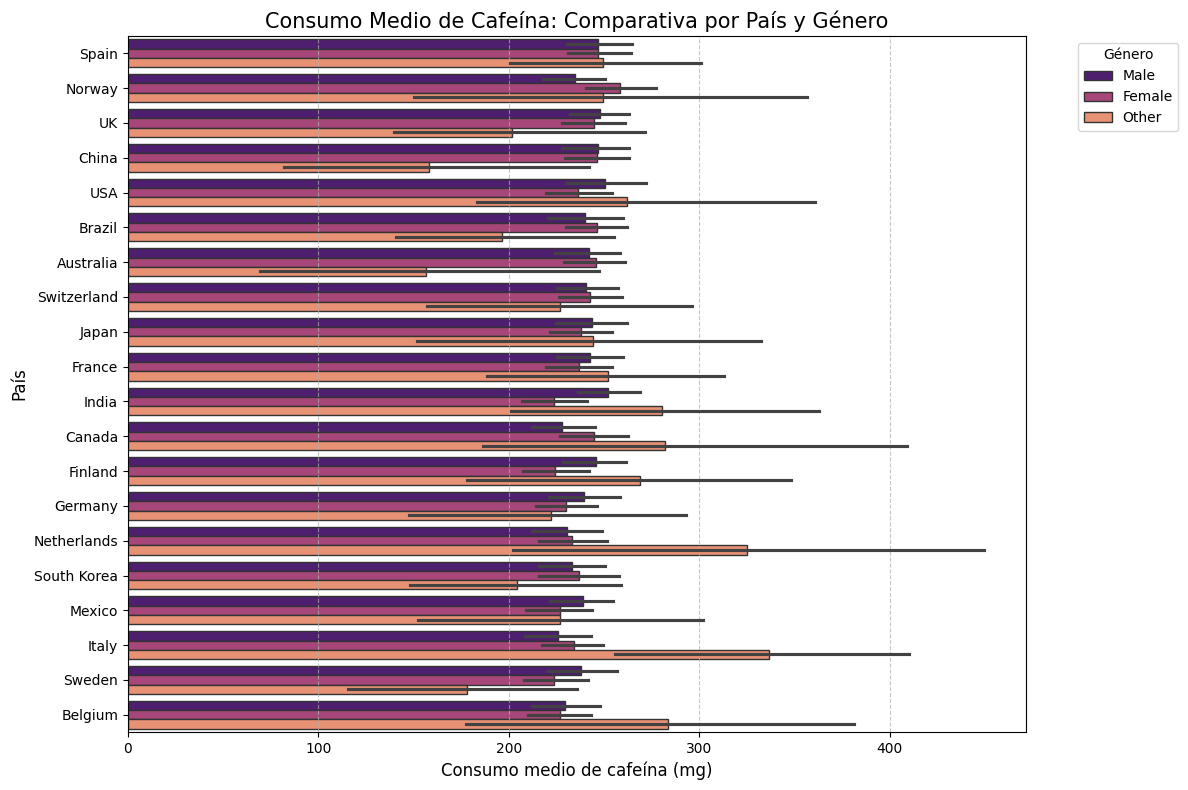

In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos el orden de los países por consumo medio total para que la gráfica se vea organizada
order = df.groupby('Country')['Caffeine_mg'].mean().sort_values(ascending=False).index

# 2. Creamos la figura
plt.figure(figsize=(12, 8))

# 3. Mezclamos ambos: Eje Y (País), Eje X (Cafeína) y Hue (Género)
# Usamos un gráfico de barras (barplot) que por defecto muestra la media
sns.barplot(
    data=df, 
    y='Country', 
    x='Caffeine_mg', 
    hue='Gender', 
    order=order,
    palette='magma', 
    edgecolor='0.2'
)

plt.title('Consumo Medio de Cafeína: Comparativa por País y Género', fontsize=15)
plt.xlabel('Consumo medio de cafeína (mg)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

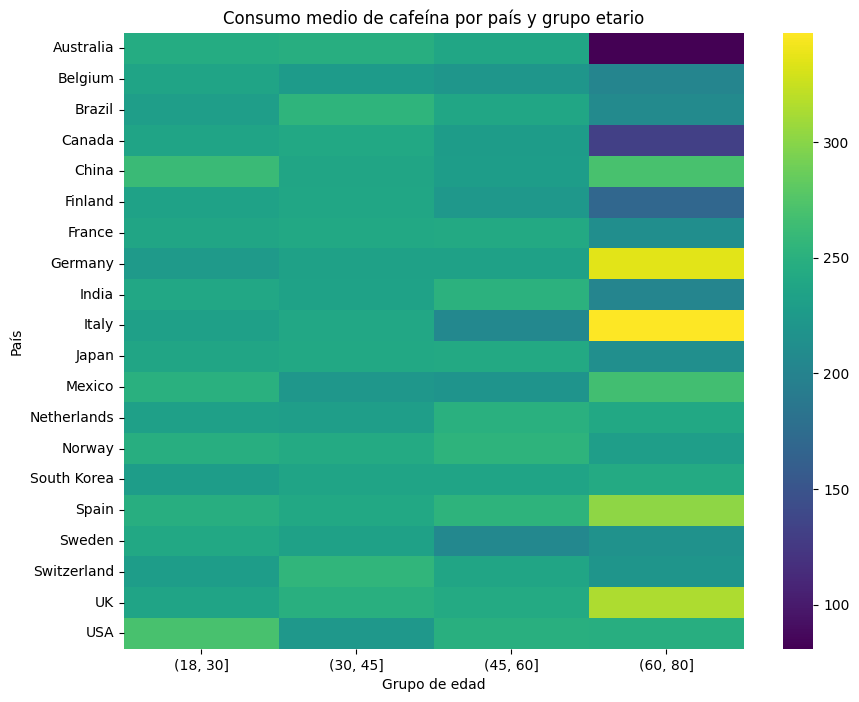

In [320]:
# 1. Creación de grupos de edad
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80])

# 2. Tabla pivote corregida (observed=False evita el FutureWarning)
pivot = df.pivot_table(
    values='Caffeine_mg',
    index='Country',
    columns='Age_Group',
    aggfunc='mean',
    observed=False
)

# 3. Visualización con el estilo original
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='viridis')
plt.title('Consumo medio de cafeína por país y grupo etario')
plt.xlabel('Grupo de edad')
plt.ylabel('País')
plt.show()

*Es imperativo señalar que, dado el carácter sintético del conjunto de datos analizado, variables sociodemográficas y de hábito como el país de origen, oficio, género y consumo de tabaco o alcohol fueron distribuidas mediante procesos de aleatorización uniforme. Como consecuencia, las visualizaciones derivadas de estas dimensiones muestran una homogeneidad estructural que carece de sesgos biológicos o culturales reales, lo que resulta en distribuciones balanceadas pero sin una relevancia clínica o estadística sustantiva para la identificación de riesgos específicos.*